# Basic Face Recognitions

## Introduction
In this assignment, we will have a look at some simple techniques for object recognition, in particular,
we will try to recognize faces. The face data that we will use is derived from the Yale Face
Database. The database consists of 5760 images of
10 individuals, each under 9 poses and 64 different lighting conditions. The availability of such standardized
databases is important for scientific research as they are useful for benchmarking different
algorithms.

In this assignment, we will only use 640 images corresponding to a frontal orientation of the face.
These faces are included in the file yaleBfaces.zip. You will find the faces divided into five different
subsets. Subset 0 consists of images where the light source direction is almost frontal, so that almost
all of the face is brightly illuminated. From subset 1 to 4, the light source is progressively moved
toward the horizon, so that the effects of shadows increase and not all pixels are illuminated. The
faces in subset 0 will be used as training images, and subsets 1 to 4 will be used as test images.

## Environment Setup
util.py requires cv2 library. Please run "conda install opencv" in Powershell if your are in Windows or Terminal if you are in Mac/Linux.

In [1]:
import os, sys
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from scipy.ndimage.filters import convolve
from scipy.ndimage.filters import gaussian_filter
import cv2
from numpy.linalg import norm
from scipy.linalg import eig

In [2]:
def load_subset(subsets, base_path='./yaleBfaces'):
    # INPUT:
    #   subsets:  the index of the subset to load, or a vector of sebset
    #      indices.  For example, loadSubset([2]) loads subset2, whereas
    #      loadSubset([0,1]) loads subset0 and subset1
    #   base_path:  the path to the yale dataset directory.  If left blank,
    #     defaults to 'yaleBfaces'
    # 
    # OUTPUT:
    #   imgs: a NXd matrix of images, where N is the number of images and d is
    #      the number of pixels in each image
    #   labels: a vector of length N, storing the person or class ID of each
    #     image
    imgs = []
    labels = []
    
    for subset in subsets:
        directory = os.path.join(base_path, "subset" + str(subset))
        files = os.listdir(directory)
        # sort files by name then load to make my life easier
        files = sorted(files)
        for img in files:
            face = cv2.imread(os.path.join(directory,img), cv2.IMREAD_GRAYSCALE)
            imgs.append(face)
            labels.append(int(img.split('person')[1].split('_')[0]))
    return imgs, labels

In [3]:
def draw_faces(img_list, col=10):
    # Draw faces
    fig = plt.figure(figsize = (30,30))
    if len(img_list) < col:
        col = len(img_list)
        row = 1
    else:
        row = int(len(img_list)/col)
    for sub_img in range(1,row*col+1):
        ax = fig.add_subplot(row, col, sub_img)
        ax.imshow(img_list[sub_img-1], cmap='gray')
        ax.axis('off')
    plt.show()

## Problem 1 (Programing):  Naive Recognition (15 points)
For this first problem, you will do face recognition by comparing the raw pixel values of the images.
Let subset 0 be the train set, and report classification accuracy on test sets 1 to 4. Use the nearest
neighbor classifier (1-NN) using the l2 norm (i.e. Euclidean distance).
1. (5 points) Once you have classified all images in a test set, report the average accuracy for each test set (percentage of correctly labeled images), i.e. 4 numbers.
2. (5 points) Comment on the performance, does it make sense? Is there any difference between
the sets?
3. (5 points) Show any two misclassified examples and explain why these might have been misclassified.

In [4]:
# train_imgs, train_labels = load_subset([0])
imgs1, true_labels1 = load_subset([1])
imgs2, true_labels2 = load_subset([2])
imgs3, true_labels3 = load_subset([3])
imgs4, true_labels4 = load_subset([4])

def get_prediction(test_imgs, train_imgs, train_label):
    dist = []
    label = []
    num_test_imgs = np.asarray(test_imgs).shape[0]
    num_train_imgs = np.asarray(train_imgs).shape[0]
    for imTest in range(num_test_imgs):
        for imTrain in range(num_train_imgs):
            dist.append(norm(test_imgs[imTest].astype(float) 
                             - train_imgs[imTrain].astype(float)))
        nearest_ind = dist.index(min(dist))
        label.append(train_label[nearest_ind])
        dist=[]
    return label

def predict_naive(train_img, label0):
    # test_imgs: list of Nxd array for Subset 1-4 as test cases
    # train_img: Nxd array for Subset0 as trainning set
    # label0: training set label
    # Your Code Here
    label1 = get_prediction(imgs1, train_img, label0)
    label2 = get_prediction(imgs2, train_img, label0)
    label3 = get_prediction(imgs3, train_img, label0)
    label4 = get_prediction(imgs4, train_img, label0)
    return label1, label2, label3, label4


In [5]:
train_img, label0 = load_subset([0])
# Your Implememnation: You have to load the test set (Subset 1-4) by your self.
label1, label2 ,label3, label4 = predict_naive(train_img, label0)
def evaluate(label1, label2, label3, label4):
    _, l = np.array(load_subset([1]))
    print("Subset 1 accuracy: " + str(np.count_nonzero((np.array(label1)-l) == 0) / len(label1) * 100) + "%")
    _, l = np.array(load_subset([2]))
    print("Subset 2 accuracy: " + str(np.count_nonzero((np.array(label2)-l) == 0) / len(label2) * 100) + "%")
    _, l = np.array(load_subset([3]))
    print("Subset 3 accuracy: " + str(np.count_nonzero((np.array(label3)-l) == 0) / len(label3) * 100) + "%")
    _, l = np.array(load_subset([4]))
    print("Subset 4 accuracy: " + str(np.count_nonzero((np.array(label4)-l) == 0) / len(label4) * 100) + "%")
evaluate(label1, label2 ,label3, label4)

Subset 1 accuracy: 94.16666666666667%
Subset 2 accuracy: 51.66666666666667%
Subset 3 accuracy: 19.28571428571429%
Subset 4 accuracy: 15.263157894736842%


### Q1.1 Results

As shown above.

### Q1.2 Comments on results
The classification performance from Q1.1 does make sense. Observing the data set, we see the major difference between each test subset is the lighting condition. Subset 1 has very similar lighting condition with trainset (i.e. subset0), hence we see it gets highest accuracy. Subset 2 introduces slight shadows around people's nose, but the accuracy drops to only 51%. However, I think this is also an expected result since we are just naively comparing pixels and determine nearest neighbor, then it make sense that a small area of shadow would significantly reduce accuracy. Due to the same reason, we see accuracy on subset 3 and 4 are very poor since subset 3 and 4 have even worse lighting condition. 

In conclusion, we observe the trend is that, as there are more and more shadows, the accuracy gets lower and lower, which is expected results since we are only comparing raw pixels and classify images using nearest neighbor technique.

1NN Classification result on subset 2:
 [ 4  4  4  1  4  4  1  1  4  7  9  9  2  4  4  2  4  4  2  2  2  4  2  2
  4  7  7  3  4  4  3  1  4  7  9  9  4  4  4  4  4  4  4  4  4  4  4  4
  5  7  7  9  7  7  5  5  5  7  9  9  6  7  4  6  4  4  6  6  6  7  6  9
  4  4  4  7  4  4  4  7  4  7  4  7  8  8  4  8  4  4  8  8  8  8  8  8
  9  9  9  9  4  4  9  9  9  9  9  9 10  7  7 10  4  7 10 10 10  7  8  9]
True subset 2:
 [ 1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2
  3  3  3  3  3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4
  5  5  5  5  5  5  5  5  5  5  5  5  6  6  6  6  6  6  6  6  6  6  6  6
  7  7  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  8  8
  9  9  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10 10 10 10 10 10 10]
Training set labels:
 [ 1  1  1  1  1  1  1  2  2  2  2  2  2  2  3  3  3  3  3  3  3  4  4  4
  4  4  4  4  5  5  5  5  5  5  5  6  6  6  6  6  6  6  7  7  7  7  7  7
  7  8  8  8  8  8  8  8  9  9  9  9  9  9  

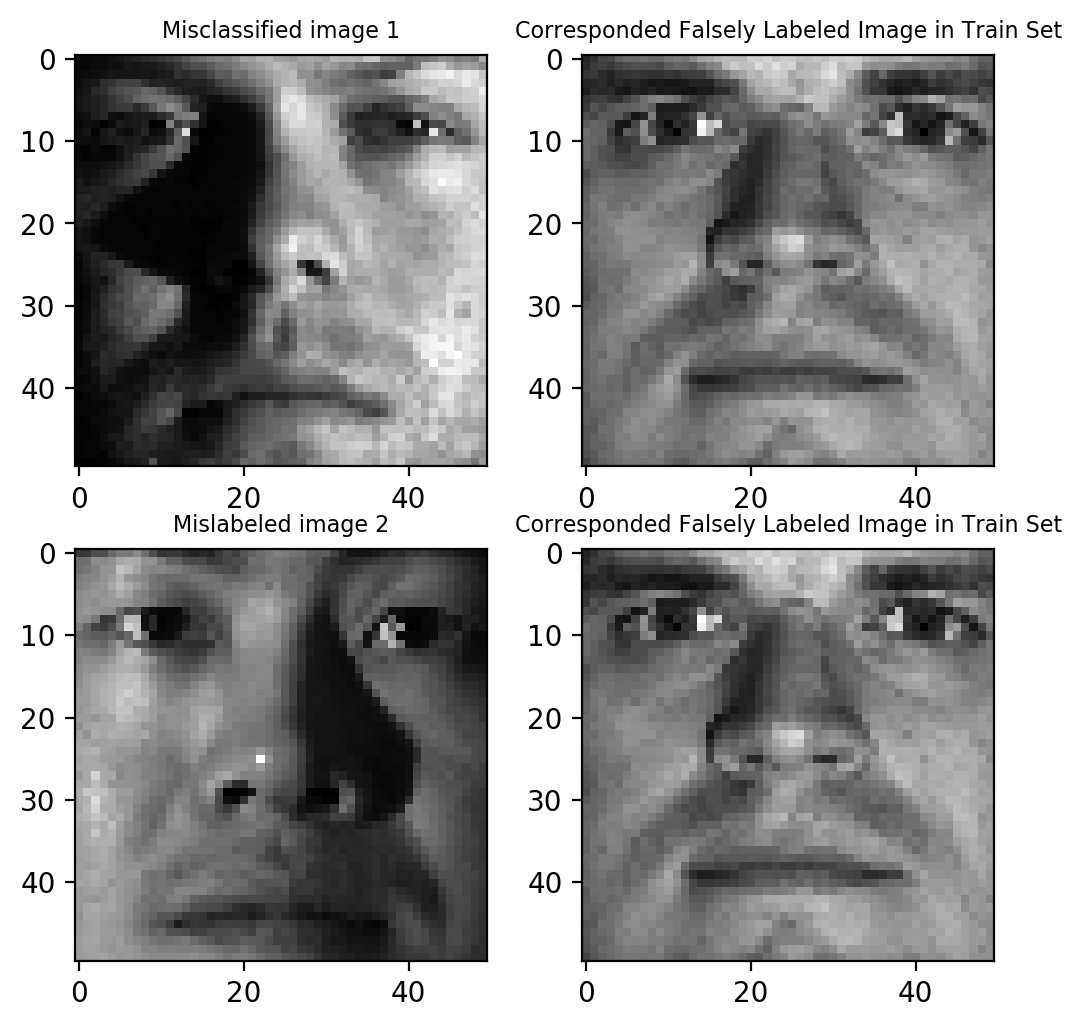

In [6]:
print ("1NN Classification result on subset 2:\n", np.asarray(label2))
print ("True subset 2:\n", np.asarray(true_labels2))
print ("Training set labels:\n", np.asarray(label0))

def show_mislabeled_img():
    #show any two misclassified examples

    subplots = plt.figure(figsize=[6, 6],dpi=200)
    ax1 = plt.subplot("221")
    ax1.set_title('Misclassified image 1',fontsize=8)
    ax1.imshow(imgs2[0], cmap='gray')

    ax3 = plt.subplot("222")
    ax3.set_title('Corresponded Falsely Labeled Image in Train Set',fontsize=8)
    ax3.imshow(train_img[22], cmap='gray')
    
    ax4 = plt.subplot("223")
    ax4.set_title('Mislabeled image 2',fontsize=8)
    ax4.imshow(imgs2[13], cmap='gray')

    ax6 = plt.subplot("224")
    ax6.set_title('Corresponded Falsely Labeled Image in Train Set',fontsize=8)
    ax6.imshow(train_img[22], cmap='gray')

        
show_mislabeled_img()

### Q1.3 Report

Above are two images that were misclassified. First mislabeled person should be person 1, and second mislabeled person should be person 2. But both of them were misclassified as person 4. I think the reason of these misclassification is that, as I stated in Q1.2, we are only comparing raw pixels and classify images using nearest neighbor technique; so we should expect shadows on images will affect classification performance significantly. Specifacally, in examples I chose, the big shadow on the left to the first person's nose and the big shadow on the right to the second person's nose. These shadows will mess up with 1NN classification since the pixel values will be very small (black, around 0), but images on training set don't usually have these big shadows. Moreover, the opposite of shadows are bright regions due to lighting condition, their pixel values will be comparably large. Both shadows and bright regions will affect L2 norm calculation results of 1NN, hence they will cause misclassification on images with shadows as shown above. Other variations, like expression, face size, beard, etc might also have been reasons of misclassification. But I think the fundamental cuase of misclassification on these images is because of the raw pixels comparison technique we are using.

## Problem 2 (Programing): k-Nearest Neighbors Recognition (10 points)

Instead of using a single nearest neighbor, sometimes it is useful to consider the consensus (majority
vote) of k-nearest neighbours. Repeat Part 1.1 using k-nearest neighbor classifier (k-NN).
1. (4 points) Test the performance for each test dataset using k ∈ 1, 3, 5. Note that you already
have the results for k = 1 from Part 1.
2. (4 points) Test the performance for each test dataset using the l1 norm rather than the l2
norm with k ∈ 1, 3, 5.
3. (2 points) Compare the performance of the classification with increasing k. Also comment
on whether changing the distance metric influenced the results (if they did). Briefly justify
the results observed.

In [7]:
from scipy.stats import mode

def mink(lst, k):
    ret = sorted(lst, key=lambda x:x[0])
    return ret[0:k]

def get_labels(lst, train_label):
    ret = []
    for i in range(len(lst)):
        ind = lst[i][1]
        ret.append(train_label[ind])
    return ret

def get_knn_prediction(test_imgs, train_imgs, train_label, k, l1Flag):
    dist = []
    label = []
    num_test_imgs = np.asarray(test_imgs).shape[0]
    num_train_imgs = np.asarray(train_imgs).shape[0]
    for imTest in range(num_test_imgs):
        for imTrain in range(num_train_imgs):
            if (l1Flag):
                dist.append([norm(test_imgs[imTest].flatten().astype(float) 
                             - train_imgs[imTrain].flatten().astype(float), ord=1)
                             , imTrain])
            else:
                dist.append([norm(test_imgs[imTest].astype(float) 
                             - train_imgs[imTrain].astype(float)), imTrain])

        k_min_dist = mink(dist,k)
        k_nst_label = get_labels(k_min_dist, train_label)
        # break tie
        if (len(np.unique(k_nst_label)) == k):
            label.append(k_nst_label[0])
            dist=[]
            continue
        # no tie
        m = mode(k_nst_label)
        label.append(m[0][0])
        dist=[]
    return label

def predict_knn_l2(train_img, label0, k):
    # Your Implemenation Here
    label1 = get_knn_prediction(imgs1, train_img, label0, k, False)
    label2 = get_knn_prediction(imgs2, train_img, label0, k, False)
    label3 = get_knn_prediction(imgs3, train_img, label0, k, False)
    label4 = get_knn_prediction(imgs4, train_img, label0, k, False)

    return label1, label2, label3, label4

def predict_knn_l1(train_img, label0, k):
    # Your Implemenation Here
    label1 = get_knn_prediction(imgs1, train_img, label0, k, True)
    label2 = get_knn_prediction(imgs2, train_img, label0, k, True)
    label3 = get_knn_prediction(imgs3, train_img, label0, k, True)
    label4 = get_knn_prediction(imgs4, train_img, label0, k, True)
    
    return label1, label2, label3, label4

In [8]:
train_img, label0 = load_subset([0])
# Your Implememnation: You have to load the test set (Subset 1-4) by your self.
def evaluate(label1, label2, label3, label4):
    _, l = np.array(load_subset([1]))
    print("Subset 1 accuracy: " + str(np.count_nonzero((np.array(label1)-l) == 0) / len(label1) * 100) + "%")
    _, l = np.array(load_subset([2]))
    print("Subset 2 accuracy: " + str(np.count_nonzero((np.array(label2)-l) == 0) / len(label2) * 100) + "%")
    _, l = np.array(load_subset([3]))
    print("Subset 3 accuracy: " + str(np.count_nonzero((np.array(label3)-l) == 0) / len(label3) * 100) + "%")
    _, l = np.array(load_subset([4]))
    print("Subset 4 accuracy: " + str(np.count_nonzero((np.array(label4)-l) == 0) / len(label4) * 100) + "%")
    
def show_result(k):
    print("k = " + str(k))
    print("By using l2 norm: ")
    label1, label2 ,label3, label4 = predict_knn_l2(train_img, label0, k)
    evaluate(label1, label2 ,label3, label4)
    print("By using l1 norm: ")
    label1, label2 ,label3, label4 = predict_knn_l1(train_img, label0, k)
    evaluate(label1, label2 ,label3, label4)
    print("\n")

show_result(1)
show_result(3)
show_result(5)

k = 1
By using l2 norm: 
Subset 1 accuracy: 94.16666666666667%
Subset 2 accuracy: 51.66666666666667%
Subset 3 accuracy: 19.28571428571429%
Subset 4 accuracy: 15.263157894736842%
By using l1 norm: 
Subset 1 accuracy: 94.16666666666667%
Subset 2 accuracy: 51.66666666666667%
Subset 3 accuracy: 21.428571428571427%
Subset 4 accuracy: 13.157894736842104%


k = 3
By using l2 norm: 
Subset 1 accuracy: 94.16666666666667%
Subset 2 accuracy: 51.66666666666667%
Subset 3 accuracy: 20.714285714285715%
Subset 4 accuracy: 15.263157894736842%
By using l1 norm: 
Subset 1 accuracy: 92.5%
Subset 2 accuracy: 51.66666666666667%
Subset 3 accuracy: 22.142857142857142%
Subset 4 accuracy: 13.684210526315791%


k = 5
By using l2 norm: 
Subset 1 accuracy: 95.0%
Subset 2 accuracy: 49.166666666666664%
Subset 3 accuracy: 16.428571428571427%
Subset 4 accuracy: 11.052631578947368%
By using l1 norm: 
Subset 1 accuracy: 93.33333333333333%
Subset 2 accuracy: 50.0%
Subset 3 accuracy: 17.857142857142858%
Subset 4 accuracy:

### Q2.2 Report

Above are kNN classification results with $k = 1,3,5$. We see that changing distance metrics does affect classification result, but very slightly. I think this is reasonable since using different distance metrics means we are using different numerical methods to calculate distance between any two image vectors. However, the difference between L1 and L2 norm is not very big. This is because our strategy of classification did not change (i.e. comparing raw pixels), so we should expect accuracy results not differing too much between L1 and L2 norm. Due to the same reason, we see that kNN does improve performance too much compare to 1NN. Moreover, I suspect that the other reason that kNN's results does not improve 1NN too much is that there are ties existed when voting. And different tie breaking strategy could results flutuation on classification results (in my case, I'm always choosing first label if there are ties).

## Problem 3 (Programing): Recognition Using Eigenfaces (25 points)
<ul>
<li>(5 points) Write a function eigenTrain(trainset,k) that takes as input a N × d matrix
trainset of vectorized images from subset 0, where N = 70 is the number of training images
and d = 2500 is the number of pixels in each training image. Perform PCA on the data and
compute the top k = 20 eigenvectors. Return the k × d matrix of eigenvectors W, and a d
dimensional vector mu encoding the mean of the training images.</li>

<li> (2 points) Rearrange each of the top 20 eigenvectors you obtained in the previous step into a
2D image of size 50 × 50. Display these images by appending them together into a 500 × 100
image (a 10 × 2 grid of images).</li>

<li>(2 points) Explain the objective of performing PCA on the training images. What does this
achieve?</li>
<li>(2 points) Select one image per person from subset 0 (e.g., the 5 images person01 01.png,
person02 01.png, ... , person10 01.png). Show what each of these images would look like
when using only the top k eigenvectors to reconstruct them, for k = 1, 2, 3, 4, 5, ...10. This
reconstruction procedure should project each image into a k dimensional space, project that k
dimensional space back into a 2500 dimensional space, and finally resize that 2500 vector into
a 50 × 50 image.</li>
</li>
<ul>
    
<li>(10 points) Write a function called eigenTest(trainset,trainlabels,testset,W,mu,k)
that takes as input :

<li>The same N × d matrix trainset of vectorized images from subset 0</li>
<li>An N dimensional vector trainlabels that encodes the class label of each training image
(e.g., 1 for person01, 2 for person02, etc.)</li>
<li>An M × d matrix testset of M vectorized images from one of the test subsets (1-4)</li>
<li>The output of PCA i.e. W and mu, and the number of eigenvectors to use k</li>
</ul>
Project each image from trainset and testset onto the space spanned by the first k eigenvectors.
For each test image, find the nearest neighbor (1-NN) in the training set using an L2
distance in this lower dimensional space and predict the class label as the class of the nearest
training image. Your function should return an M dimensional vector testlabels encoding
the predicted class label for each test example. Evaluate eigenTest on each test subset 1-4
separately for values k = 1...20 (so it should be evaluated 4 × 20 times). Plot the error rate
(fraction of incorrect predicted class labels) of each subset as a function of k in the same plot,
and use the Python legend function add a _legend_ to your plot.</li>
<li>(2 points) Repeat the experiment from the previous step, but throw out the first 4 eigenvectors.
That is, use k eigenvectors starting with the 5th eigenvector. Produce a plot similar to the one
in the previous step. How do you explain the difference in recognition performance from the
previous part?</li>
<li>(2 points) Explain any trends you observe in the variation of error rates as you move from
subsets 1 to 4 and as you increase the number of eigenvectors. Use images from each subset
to reinforce your claims.</li>
</ul>


In [18]:
imgs, label0 = load_subset([0])
trainset = np.reshape(np.asarray(imgs).astype(float),(70, 2500))

In [19]:
def PCA(trainset,k):
    mu = np.zeros(2500)
    for i in range(trainset.shape[1]):
        mu[i] = np.mean(trainset[:,i])
    D = trainset - mu
    U, S, V_t = np.linalg.svd(D, full_matrices=False)
    W = V_t[:k]
    projection =  D @ W.T
    return projection, mu, W

def drop_k_PCA(trainset,k):
    mu = np.zeros(2500)
    for i in range(trainset.shape[1]):
        mu[i] = np.mean(trainset[:,i])
    D = trainset - mu
    U, S, V_t = np.linalg.svd(D, full_matrices=False)
    W = V_t[4:k+4]
    eigvecs =  D @ W.T
    return eigvecs, mu, W

In [20]:
def eigenTrain(trainset,k):
    projection, mu, W = PCA(trainset,k)
    return projection, mu, W

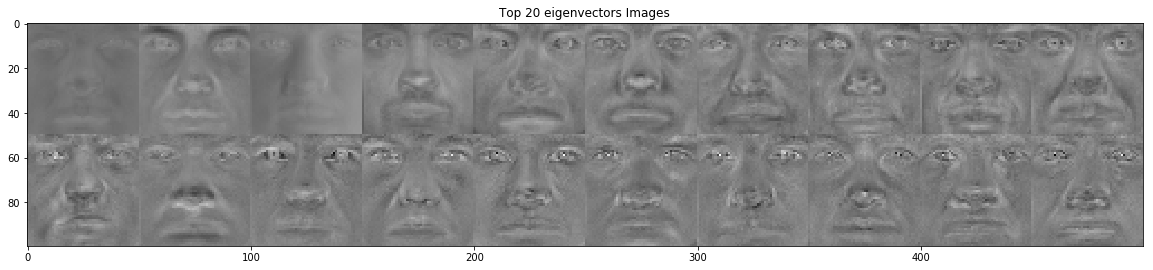

In [21]:
def displayImages(W):
    imgs = []
    for i in range(20):
        im = W[i].reshape(50,50)
        imgs.append(im)
    upper = np.hstack(imgs[0:10])
    lower = np.hstack(imgs[10:20])
    image = np.vstack((upper, lower))
    plt.figure(figsize=(20,10))
    plt.title('Top 20 eigenvectors Images')
    plt.imshow(image, cmap='gray')
    
projection, mu, W = eigenTrain(trainset,20)
displayImages(W)

### Objective of PCA

The main objective of PCA is to find principal components eigenvectors, or we can think them as common factors, from a $M \times N$ dataset (In our case, the dataset we have is $70 \times 2500$). Then we rank these common factors (eigenvectors) according to their importance in relation with dataset. By doing so, the less important information is discarded (e.g. details/noises on and image) while only important information is keeped. Hence the dimension of data is reduced once we apply these common factors to data.

In short, PCA reduces dimentionality of data. And theoretically, in order to get more repensentative representation of data, the the strategy it uses are 1) identify a collection of independent linear features, and 2) capture as much variance as possible variance from dataset.

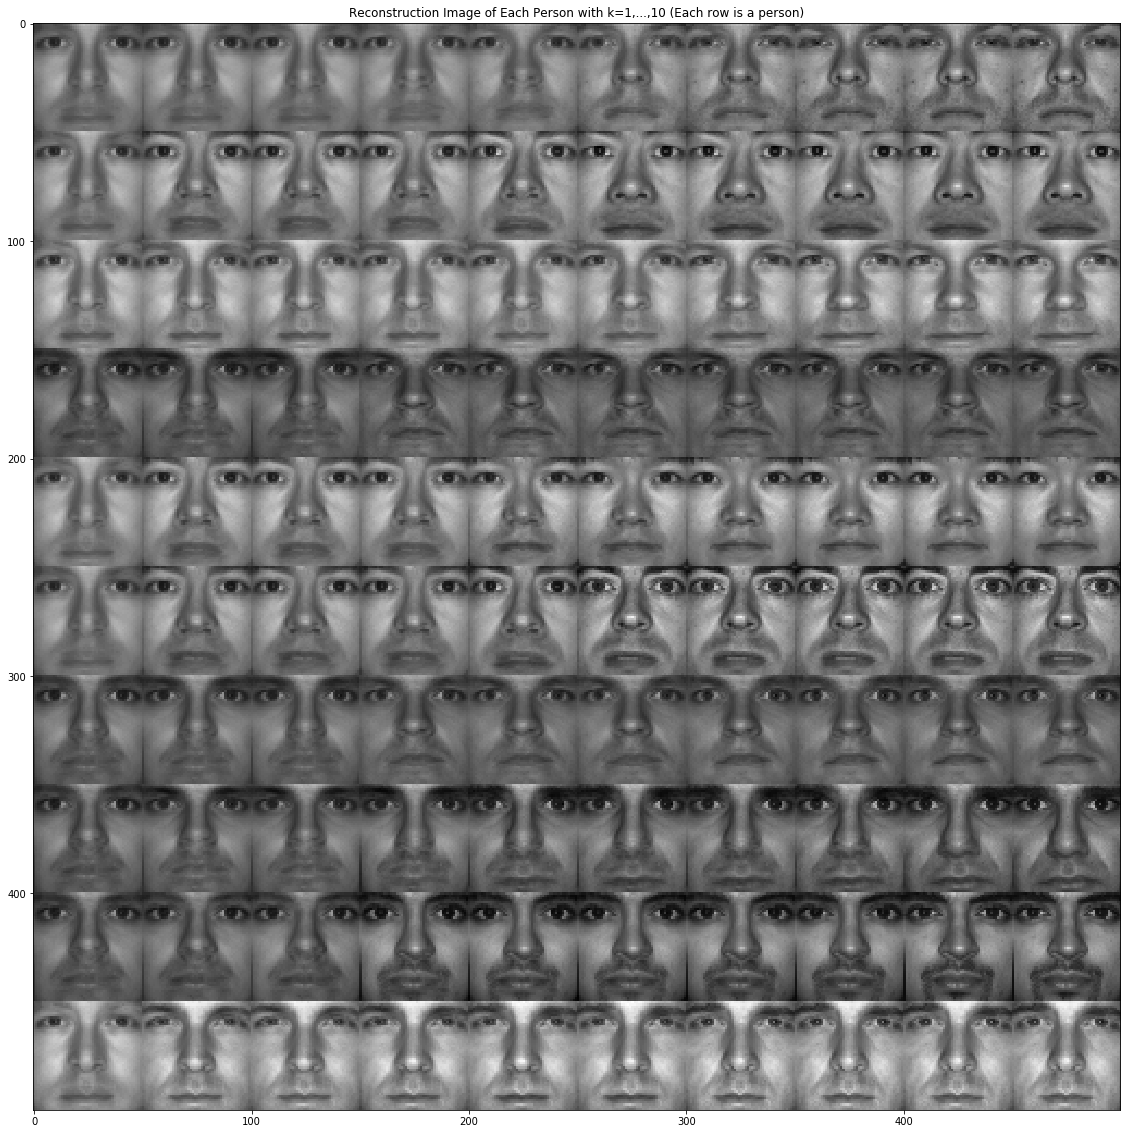

In [42]:
def show_people(trainset, labels, mu):
    chosen_label = []
    chosen_img = []
    for i in range(len(labels)):
        if labels[i] not in chosen_label:
            chosen_label.append(labels[i])
            chosen_img.append(trainset[i].reshape(2500))
    
    chosen_img = [chosen_img for _,chosen_img 
                  in sorted(zip(chosen_label,chosen_img))]
    chosen_label = sorted(chosen_label)
    
    chosen_set = np.vstack(chosen_img[0:10])

    mu_shft_img = chosen_img - mu
    
    whole = []
    for i in range(10):
        row = []
        for j in range(1,11):
            _, mu, W = eigenTrain(trainset, j)
            # project
            proj_imgs = mu_shft_img @ W.T
            # reconstruct
            rec_imgs = proj_imgs @ W + mu

            row.append(rec_imgs[i].reshape(50,50))
        row_im = np.hstack(row[:])
        whole.append(row_im)
    whole_im = np.vstack(whole[:])
    
    plt.figure(figsize=(20,20))
    plt.title('Reconstruction Image of Each Person with k=1,...,10 (Each row is a person)')
    plt.imshow(whole_im, cmap="gray")

show_people(trainset,label0,mu)

In [44]:
# reloat subsets
imgs1, true_labels1 = load_subset([1])
imgs1 = np.asarray(imgs1).astype(np.float64).reshape(len(imgs1), 2500)

imgs2, true_labels2 = load_subset([2])
imgs2 = np.asarray(imgs2).astype(np.float64).reshape(len(imgs2), 2500)

imgs3, true_labels3 = load_subset([3])
imgs3 = np.asarray(imgs3).astype(np.float64).reshape(len(imgs3), 2500)

imgs4, true_labels4 = load_subset([4])
imgs4 = np.asarray(imgs4).astype(np.float64).reshape(len(imgs4), 2500)

In [45]:
def eigenTest(trainset,trainlabels,testset,W,mu,k):
    # Your Implementation Here
    # trainset: 
    #    N × d matrix trainset of vectorized images from subset 0
    # trainlabels:
    #    An N dimensional vector trainlabels that encodes the class 
    #    label of each training image 
    # testset:
    #    M × d matrix testset of M vectorized images from one of 
    #    the test subsets (1-4)
    # W:
    #    Coefficients of PCA
    # mu:
    #    Estimated mean
    # k:
    #    number of eigenvectors
    def process_img(imgset, W, k, mu):
        ret_proj = []
        for i in range(imgset.shape[0]):
            ret_proj.append((imgset[i]-mu)@W[:k].T)
        return np.asarray(ret_proj)

    proj_train = process_img(trainset, W, k, mu)        
    proj_test = process_img(testset, W, k, mu)    
    pred_labels = get_prediction(proj_test, proj_train, trainlabels)
    return pred_labels

def evaluate_eigenFace(optimal_flag):
    if optimal_flag == True:
        projection, mu, W = eigenTrain(trainset,20)
    else:
        projection, mu, W = drop_k_PCA(trainset,20)
    img1_err_rate = []
    img2_err_rate = []
    img3_err_rate = []
    img4_err_rate = []
    for k in range(1,21):
        pred_label1 = eigenTest(trainset,label0,imgs1, W, mu, k)
        err1_k = 1 - (np.count_nonzero((np.array(pred_label1)
                                        -true_labels1) == 0) / len(pred_label1))
        img1_err_rate.append(err1_k)
        
        pred_label2 = eigenTest(trainset,label0,imgs2, W, mu, k)
        err2_k = 1 - (np.count_nonzero((np.array(pred_label2)
                                        -true_labels2) == 0) / len(pred_label2))
        img2_err_rate.append(err2_k)

        pred_label3 = eigenTest(trainset,label0,imgs3, W, mu, k)
        err3_k = 1 - (np.count_nonzero((np.array(pred_label3)
                                        -true_labels3) == 0) / len(pred_label3))
        img3_err_rate.append(err3_k)

        pred_label4 = eigenTest(trainset,label0,imgs4, W, mu, k)
        err4_k = 1 - (np.count_nonzero((np.array(pred_label4)
                                        -true_labels4) == 0) / len(pred_label4))
        img4_err_rate.append(err4_k)
    return img1_err_rate, img2_err_rate, img3_err_rate, img4_err_rate


In [49]:
def plot_20k_err(err1,err2,err3,err4, title_flag):
    fig = plt.figure(figsize=(16,8))
    ax = fig.add_subplot(111)
    if title_flag == True:
        ax.set_title("Error Rate of eigenTrain Detection")
    else:
        ax.set_title("Error Rate of eigenTrain Detection w/o top 4 eigenvectors")
    ax.grid('on')
    
    x = np.arange(20)+1
    ys = np.row_stack((err1,err2,err3,err4))
    plt.xticks(x)

    plt.xlabel('Value of k')
    plt.ylabel('Error Rate')

    color = ['c','g','b','r']
    for i in range(4):
        ax.plot(x, ys[i,:], label='Test image set '
                +str(i+1), color=color[i], marker='p')

    handles, names = ax.get_legend_handles_labels()
    legend = ax.legend(handles, names, loc='lower left')

# used in explanation
def show_imgs_from_each_subset():
    imgs1, true_labels1 = load_subset([1])
    imgs2, true_labels2 = load_subset([2])
    imgs3, true_labels3 = load_subset([3])
    imgs4, true_labels4 = load_subset([4])
    subplots = plt.figure(figsize=[16, 8],dpi=200)
    ax1 = plt.subplot("141")
    ax1.set_title('Image 1 from subset 1',fontsize=10)
    ax1.imshow(imgs1[0], cmap='gray')

    ax3 = plt.subplot("142")
    ax3.set_title('Image 1 from subset 2',fontsize=10)
    ax3.imshow(imgs2[0], cmap='gray')

    ax4 = plt.subplot("143")
    ax4.set_title('Image 1 from subset 3',fontsize=10)
    ax4.imshow(imgs3[39], cmap='gray')

    ax6 = plt.subplot("144")
    ax6.set_title('Image 1 from subset 4',fontsize=10)
    ax6.imshow(imgs4[15], cmap='gray')
    plt.show()
    
    subplots = plt.figure(figsize=[16, 8],dpi=200)
    ax1 = plt.subplot("141")
    ax1.set_title('Image 2 from subset 1',fontsize=10)
    ax1.imshow(imgs1[15], cmap='gray')

    ax3 = plt.subplot("142")
    ax3.set_title('Image 2 from subset 2',fontsize=10)
    ax3.imshow(imgs2[21], cmap='gray')

    ax4 = plt.subplot("143")
    ax4.set_title('Image 2 from subset 3',fontsize=10)
    ax4.imshow(imgs3[79], cmap='gray')

    ax6 = plt.subplot("144")
    ax6.set_title('Image 2 from subset 4',fontsize=10)
    ax6.imshow(imgs4[56], cmap='gray')
    plt.show()

Best regular top k recognition result: 
Best Accuracy On Subset 1:  0.9416666666666667
Best Accuracy On Subset 2:  0.5
Best Accuracy On Subset 3:  0.18571428571428572
Best Accuracy On Subset 4:  0.14210526315789473



Best dropping first 4 eigenvectors recognition result: 
Best Accuracy On Subset 1:  0.9833333333333333
Best Accuracy On Subset 2:  0.8666666666666667
Best Accuracy On Subset 3:  0.3571428571428572
Best Accuracy On Subset 4:  0.12631578947368416


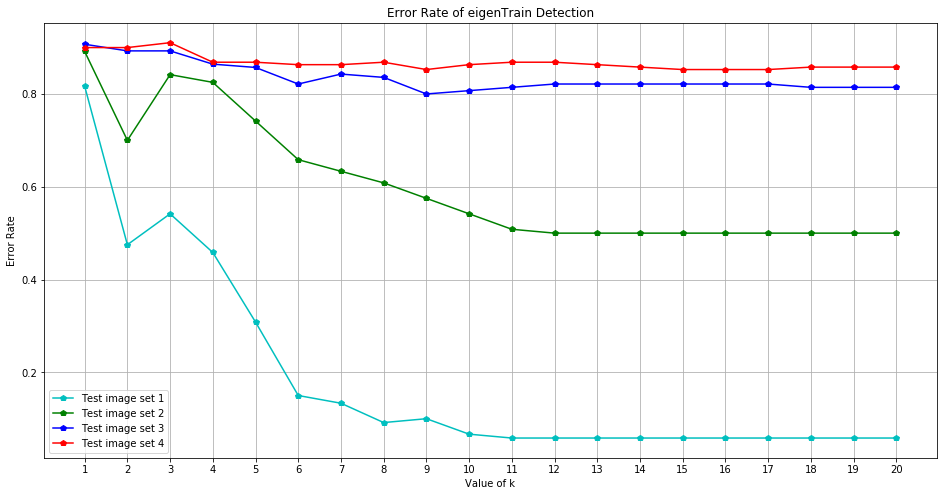

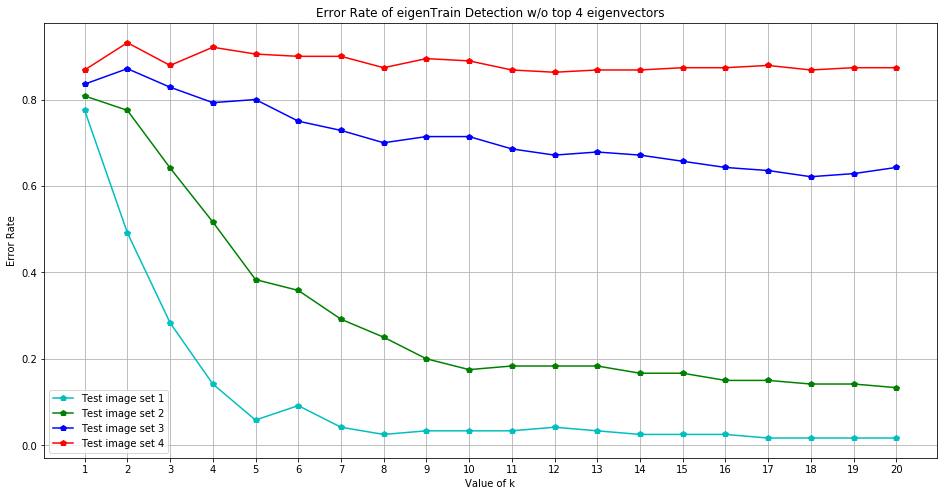

In [53]:
(img1_err_rate, img2_err_rate, 
 img3_err_rate, img4_err_rate) = evaluate_eigenFace(optimal_flag=True)
plot_20k_err(img1_err_rate, img2_err_rate, img3_err_rate, img4_err_rate, True)
print("Best regular top k recognition result: ")
print("Best Accuracy On Subset 1: ", 1-np.asarray(img1_err_rate[19]))
print("Best Accuracy On Subset 2: ", 1-np.asarray(img2_err_rate[19]))
print("Best Accuracy On Subset 3: ", 1-np.asarray(img3_err_rate[19]))
print("Best Accuracy On Subset 4: ", 1-np.asarray(img4_err_rate[19]))

print("\n\n")

print("Best dropping first 4 eigenvectors recognition result: ")
(img1_err_rate, img2_err_rate, 
 img3_err_rate, img4_err_rate) = evaluate_eigenFace(optimal_flag=False)
plot_20k_err(img1_err_rate, img2_err_rate, img3_err_rate, img4_err_rate, False)
print("Best Accuracy On Subset 1: ", 1-np.asarray(img1_err_rate[19]))
print("Best Accuracy On Subset 2: ", 1-np.asarray(img2_err_rate[19]))
print("Best Accuracy On Subset 3: ", 1-np.asarray(img3_err_rate[19]))
print("Best Accuracy On Subset 4: ", 1-np.asarray(img4_err_rate[19]))

### Explanation of performance difference between with top 4 eigenface with without top 4 eigenface:
As we see the the best accuracies printed above, and the graphes plotted above, we conclude that dropping first four eigenvectors increases recognition performance. I think this is because the eigenvectors are sorted based on their importance, however, more important eigenvector means that it is a more "common feature" among all images. Resulting that top k eigenvectors cannot handle discriminative task. As we see the plot of top k eigenvectors, first few eigenvectors are just a very basic skelenton of faces. Then these eigenvectors is not very helpful for recognition since all faces has these fundamental features. Thus by dropping these eigenvectors that represents "common features", we are choosing more distinguishble eigenvectors hence the recognition performance improves.


### Trends I observe in the variation of error rates as I move from subsets 1 to 4 and as you increase the number of eigenvectors:

As the number of eigenvectors increase, we see the general trend of subset 1,2,3 is that the error rates are decreasing. This is because when we keep more eigenvectors, we are keeping more information of images. So obviously only keep 1 eigenvector will not give us a good recognition result, while more dimensions will generally give us more details, hence resulting better recognition performance. For those k that are do not decrease error rate from previous k's, I think they are just outliers. It could be that take certan number k eigenvectors happens to be not a good representation of data. So recognition performance drops. For subset 4, incresing k is not very helpful in terms of performance. I will talk about the reason later.

As we move from subset 1 to 4, we see that the ranking of recognition performance is: subset1 > subset2 > subset3 > subset4. This match the results in question 1. Again, I think the reason for this trend is __majorly__ because of the lighting condition. Below are two representative images from each subset. Generally, images in subset 1 has very similar lighting condition with trainset (i.e. subset0), hence we see it gets highest accuracy. Subset 2 introduces slight shadows around people's nose, so the recognition performance is not as good as subset1. However, compare to 1NN and kNN, the accuracy improves about 35% on eigenface technique w/o first 4 eigenvectors. For subset 3 and 4, accuracy on subset 3 and 4 are are still very poor since lighting conditions on images from subset 3 and 4 are generally so bad as shown below (subset 4 has the worst lighting condition). And there are even some almost pure black images from both subset 3 and subset 4. For subset 3, some images still has good lighting condition, so we see error rate plot still follows the decreasing trend. But for subset 4, I think the results of recognition performance is not very useful since the overall quality of dataset is just too poor to do analysis.

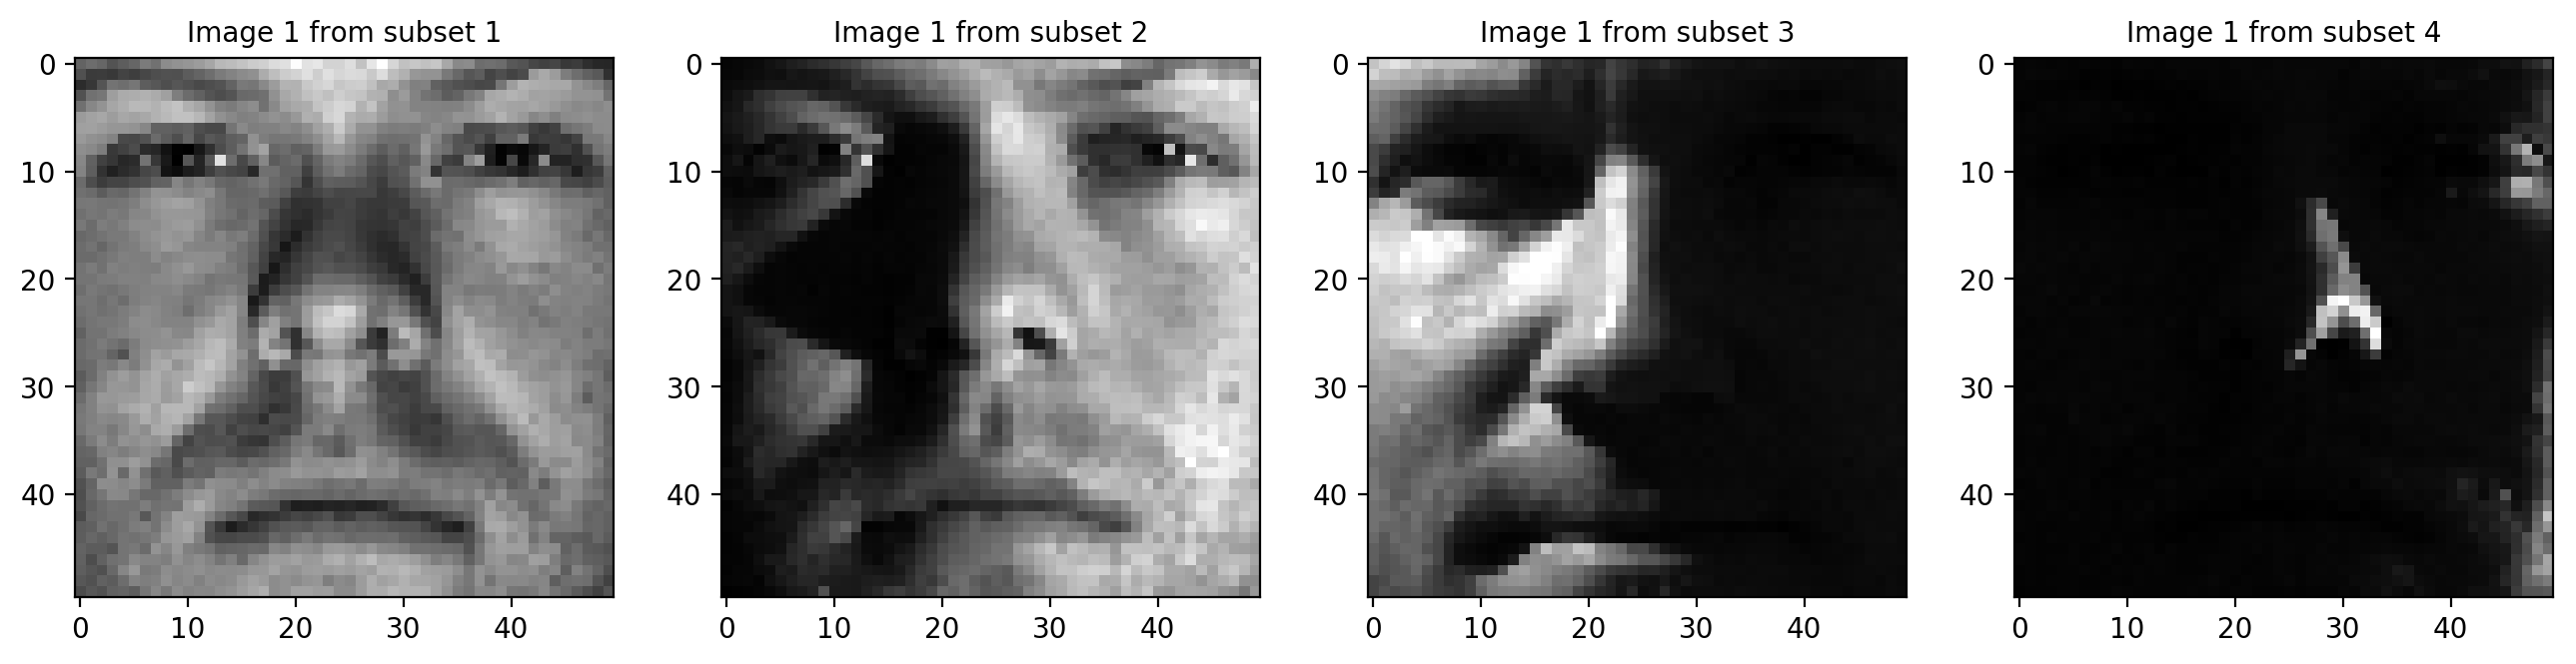

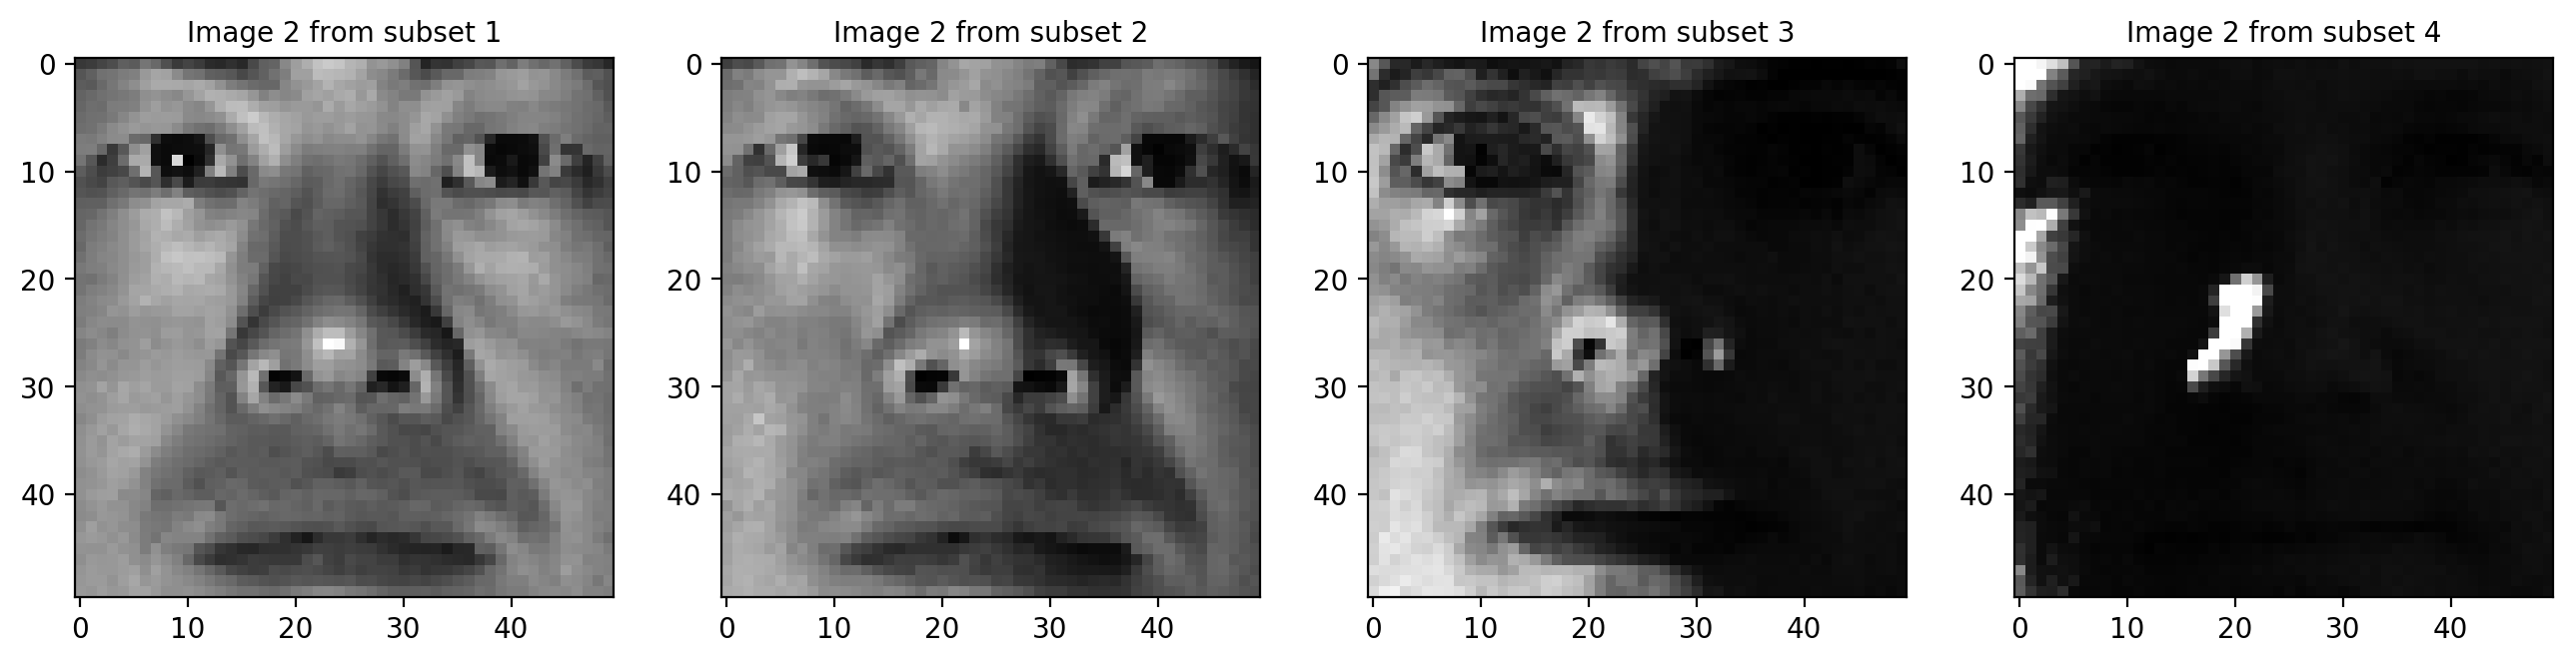

In [26]:
show_imgs_from_each_subset()

## Problem 4 (Programing): Recognition Using Fisherfaces (20 points)
<ul><li>(10 points) Write a function called fisherTrain(trainset,trainlabels,c) that
takes as input the same N × d matrix trainset of vectorized images from subset 0, the corresponding
class labels trainlabels, and the number of classes c = 10. Your function should
do the following :
<ul><li> Compute the mean $mu$ of the training data, and use PCA to compute the first N − c
principal components. Let this be $W_{PCA}$.</li>
<li> Use $W_{PCA}$ to project the training data into a space of dimension (N − c).</li>
<li> Compute the between-class scatter matrix $S_B$ and the within class scatter matrix $S_W$ on
the (N − c) dimensional space from the previous space.</li>
<li> Compute $W_{FLD}$, by solving for the generalized eigenvectors of the (c−1) largest generalized
eigenvalues for the problem $S_Bw_i = λ_iS_Ww_i$. You can use inbuilt functions to solve
for the generalized eigenvalues of $S_B$ and $S_W$.</li></ul>
<li>The fisher bases will be a $W = W_{FLD}W_{PCA}$, where W is (c − 1) × d dimensional, $W_{FLD}$
is (c − 1) × (N − c) dimensional, and $W_{PCA}$ is (N − c) × d dimensional.</li>
<li>(5 points) As in the Eigenfaces exercise, rearrange the top 9 Fisher bases you obtained in the
previous part into images of size 50 × 50 and stack them into one big 450 × 50 image.</li>
<li>(5 points) As in the eigenfaces exercise, perform recognition on the testset with Fisherfaces.
As before, use a nearest neighbor classifier (1-NN), and evaluate results separately for each
test subset 1-4 for values k = 1...9. Plot the error rate of each subset as a function of k in
the same plot, and use the legend function in Python to add a _legend_ to your
plot. Explain any trends you observe in the variation of error rates with different subsets and
different values of k, and compare performance to the Eigenface method. paper-link</li></ul>

In [54]:
def fisherTrain(trainset, trainlabel, c): 
    proj_data, im_mu, W_pca = eigenTrain(trainset,(len(trainset)-c))

    # Divide projection to 10 classes where each class represents a person
    # each class/person has 7 photos
    classes = [proj_data[x:x+7] for x in range(0, len(proj_data), 7)]

    ## Calculate Sb ##
    # mu_sb stores within class means
    mu_sb = []
    for i in range(len(classes)):
        mu_i = np.zeros(proj_data.shape[1])
        for j in range(proj_data.shape[1]):
            mu_i[j] = np.mean(classes[i][:,j])
        mu_sb.append(mu_i)
    mu_sb = np.asarray(mu_sb)

    # mu is global mean prjection
    mu = np.zeros(proj_data.shape[1])
    for i in range(proj_data.shape[1]):
        mu[i] = np.mean(mu_sb[:,i])
    
    Sb = np.zeros([60,60])
    for i in range(c):
        diff = mu_sb[i] - mu
        left = diff.reshape(len(diff),1)
        right = diff.reshape(1, len(diff))
        whole = 7*left @ right
        Sb = Sb + whole

    ## Calculate Sw ##
    Sw = np.zeros([60,60])
    for i in range(c):
        for im in classes[i]:
            diff = im - mu_sb[i]
            left = diff.reshape(len(diff),1)
            right = diff.reshape(1, len(diff))
            whole = left @ right
            Sw = Sw + whole    

    w, v = eig(Sb, Sw)
    
    # Sort eigenvectors based on eigenvalues
    srt_v = [x for _,x in sorted(zip(w,v.T), reverse=True)]
    W_fld = srt_v[0:c-1]

    # Calculate final W
    W = W_fld @ W_pca
    return W, im_mu

W, mu = fisherTrain(trainset, label0, 10)

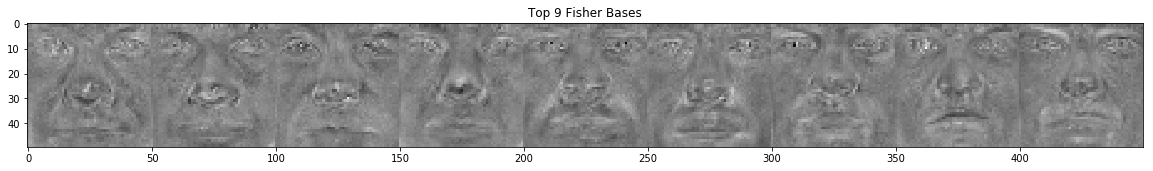

In [55]:
def displayFisher(W):
    imgs = []
    for i in range(9):
        im = W[i].reshape(50,50)
        imgs.append(im)
    image = np.hstack(imgs[:])
    plt.figure(figsize=(20,10))
    plt.title('Top 9 Fisher Bases')
    plt.imshow(image, cmap='gray')
    
W, mu = fisherTrain(trainset,label0, 10)
displayFisher(W)

In [56]:
def plot_fisher_err(err1,err2,err3,err4):
    fig = plt.figure(figsize=(16,8))
    ax = fig.add_subplot(111)
    ax.set_title("Error Rate of Fisherface Detection")
    ax.grid('on')
    
    x = np.arange(10)+1
    ys = np.row_stack((err1,err2,err3,err4))
    plt.xticks(x)

    plt.xlabel('Value of k')
    plt.ylabel('Error Rate')

    color = ['c','g','b','r']
    for i in range(4):
        ax.plot(x, ys[i,:], label='Test image set '+str(i+1), color=color[i], marker='p')

    handles, names = ax.get_legend_handles_labels()
    legend = ax.legend(handles, names, loc='lower left')

Best Accuracy On Subset 1:  1.0
Best Accuracy On Subset 2:  0.9666666666666667
Best Accuracy On Subset 3:  0.3928571428571428
Best Accuracy On Subset 4:  0.09473684210526312


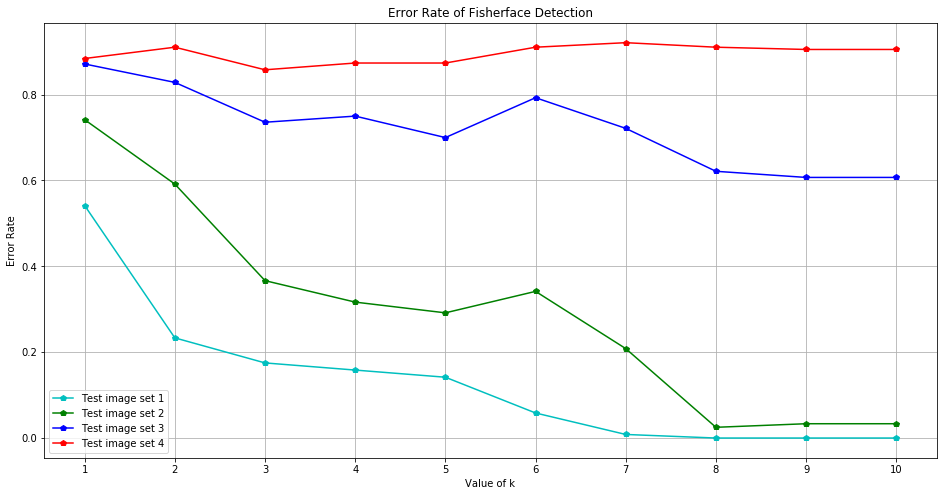

In [58]:
def fisherTest(trainset,trainlabels,testset,W,mu,k):
    def process_img(imgset, W, k, mu):
        ret_proj = []
        for i in range(imgset.shape[0]):
            ret_proj.append((imgset[i]-mu)@W[:k].T)
        return np.asarray(ret_proj)

    proj_train = process_img(trainset, W, k, mu)        
    proj_test = process_img(testset, W, k, mu)    
    pred_labels = get_prediction(proj_test, proj_train, trainlabels)
    return pred_labels

def evaluate_fisherFace(optimal_flag):
    W, mu = fisherTrain(trainset, label0, 10)
    img1_err_rate = []
    img2_err_rate = []
    img3_err_rate = []
    img4_err_rate = []
    for k in range(1,11):
        pred_label1 = fisherTest(trainset,label0,imgs1, W, mu, k)
        err1_k = 1 - (np.count_nonzero((np.array(pred_label1)-true_labels1) == 0)
                      / len(pred_label1))
        img1_err_rate.append(err1_k)
        
        pred_label2 = fisherTest(trainset,label0,imgs2, W, mu, k)
        err2_k = 1 - (np.count_nonzero((np.array(pred_label2)-true_labels2) == 0)
                      / len(pred_label2))
        img2_err_rate.append(err2_k)

        pred_label3 = fisherTest(trainset,label0,imgs3, W, mu, k)
        err3_k = 1 - (np.count_nonzero((np.array(pred_label3)-true_labels3) == 0)
                      / len(pred_label3))
        img3_err_rate.append(err3_k)

        pred_label4 = fisherTest(trainset,label0,imgs4, W, mu, k)
        err4_k = 1 - (np.count_nonzero((np.array(pred_label4)-true_labels4) == 0)
                      / len(pred_label4))
        img4_err_rate.append(err4_k)
    return img1_err_rate, img2_err_rate, img3_err_rate, img4_err_rate

(img1_err_rate, img2_err_rate, 
 img3_err_rate, img4_err_rate) = evaluate_fisherFace(optimal_flag=True)
plot_fisher_err(img1_err_rate, img2_err_rate, img3_err_rate, img4_err_rate)
print("Best Accuracy On Subset 1: ", 1-np.asarray(img1_err_rate[9]))
print("Best Accuracy On Subset 2: ", 1-np.asarray(img2_err_rate[9]))
print("Best Accuracy On Subset 3: ", 1-np.asarray(img3_err_rate[9]))
print("Best Accuracy On Subset 4: ", 1-np.asarray(img4_err_rate[9]))

###  Explain any trends you observe in the variation of error rates with different subsets and different values of k, and compare performance to the Eigenface method:

Similar to eigenface, as the number of eigenvectors increase, we see the general trend of subset 1,2,3 is that the error rates are decreasing. This is because when we keep more Fisher bases, we are keeping more information of images. So obviously only keep 1 Fisher basis will not give us a good recognition result, while more bases will generally give us better recognition performance. We again see some outlier k value in the plot. I think, in analogy to eigenfaces, the reason could be that take certan number k Fisher bases happens to be not a good representation of data . So recognition performance drops. For subset 4, incresing k is not very helpful in terms of performance. And even reduce the accuracy.  I will talk about the reason later.

As we move from subset 1 to 4, we see that the ranking of recognition performance is, again: subset1 > subset2 > subset3 > subset4. This matches both results in question 1 and results from eigenfaces. Again, I think the reason, as I stated many times, is the lighting condition. Since subset 1,2 has best lighting conditions, we see their recognition performance is indeed extremely good (100% for subset 1, and 96.6% for subset 2). Both of these recognition performance are better than recognition performance in Eigenfaces. For subset 3, we also see a small improvement (about 4%) compare to Eigenfaces without first 4 eigenvectors. However, for subset 4, we see results are getting even worse compare to Eigenfaces as k increases. But I don't think this is an issue since as I've discussed in question 3, most image's quality in subset 4 are just too bad to do analysis (i.e. recognition). Thus it is not very useful to interpret the recognition results we get for subset 4.

In conclusion, we do see Fisherfaces gives us more robust recognition performance compare to Eigenfaces since it projects away the within-class variation (especially lighting, expressions in our case) found in training set. By doing so, it resolves the difficalty of Eigenface that the method does not take discriminative task into account.